# Infering Market Cap

In [4]:
import pandas as pd
import edhec_risk_kit as erk
import fama_french_import as ff
import yahoo_import as yahoo

In [5]:
porfolio_info = yahoo.read_portfolio("tech_portfolio")
portfolio_returns = yahoo.read_portfolio_data(porfolio_info)
portfolio_returns.head()

,AMZN,GOOGL,MSFT,FB,AAPL,TSM,INTC,QCOM,AVGO,AMD
Date,,,,,,,,,,
2012-05-18,-0.020654,-0.036353,-0.015141,NaN,0.000490,-0.028572,-0.004582,-0.020644,-0.001663,-0.019576
2012-05-21,0.019920,0.022835,0.016399,-0.109861,0.058261,0.009804,0.003069,0.022151,0.029647,0.048253
2012-05-22,-0.012746,-0.021674,0.000336,-0.089039,-0.007679,-0.001387,-0.004589,0.012408,0.011647,-0.022222
2012-05-23,0.009056,0.014414,-0.021841,0.032258,0.024400,-0.022222,-0.022666,0.003625,0.071954,-0.012987
2012-05-24,-0.009389,-0.009517,-0.001375,0.032187,-0.009184,-0.008523,0.008255,-0.017028,-0.030131,-0.009868


In [8]:
mc = erk.get_market_caps(portfolio_returns, porfolio_info, normalized=False)

<AxesSubplot:xlabel='Date'>

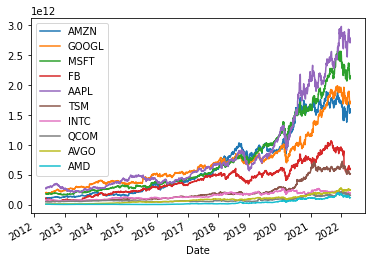

In [9]:
mc.plot()

In [10]:
resampled = erk.resample_market_caps(mc, period="M")

In [11]:
resampled.head()

,AMZN,GOOGL,MSFT,FB,AAPL,TSM,INTC,QCOM,AVGO,AMD
Date,,,,,,,,,,
2012-05,1.079769e+11,1.929807e+11,1.793567e+11,8.234010e+10,2.898631e+11,5.200182e+10,7.890642e+10,4.870884e+10,1.051637e+10,7.342269e+09
2012-06,1.158073e+11,1.927182e+11,1.879589e+11,8.651274e+10,2.930091e+11,5.287294e+10,8.137987e+10,4.732348e+10,1.145645e+10,6.919605e+09
2012-07,1.183176e+11,2.102934e+11,1.810771e+11,6.039201e+10,3.064353e+11,5.481648e+10,7.847892e+10,5.072316e+10,1.177557e+10,4.902896e+09
2012-08,1.259096e+11,2.276093e+11,1.906267e+11,5.023858e+10,3.352024e+11,5.768090e+10,7.648642e+10,5.223601e+10,1.167026e+10,4.492309e+09
2012-09,1.289779e+11,2.506696e+11,1.840704e+11,6.025292e+10,3.361396e+11,6.207564e+10,6.980198e+10,5.331360e+10,1.117845e+10,4.069646e+09


<AxesSubplot:xlabel='Date'>

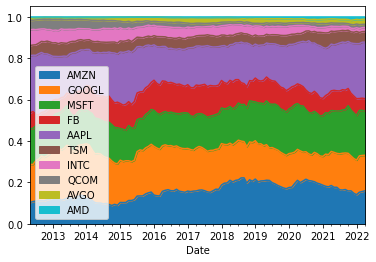

In [12]:
normalized = erk.normalize_market_caps(resampled)
normalized.plot.area()